<a href="https://colab.research.google.com/github/prasannaratnam/data_science_with_python/blob/main/Customer_Service_Requests_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# importing all the necessary libraries

import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from google.colab import files 
uploaded = files.upload()

Saving 311_Service_Requests_from_2010_to_Present.csv to 311_Service_Requests_from_2010_to_Present (2).csv


In [118]:
# importing the dataset

df = pd.read_csv(io.BytesIO(uploaded['311_Service_Requests_from_2010_to_Present.csv']))
print(df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        Unique Key  ...                                  Location
0         32310363  ...   (40.86568153633767, -73.92350095571744)
1         32309934  ...  (40.775945312321085, -73.91509393898605)
2         32309159  ...  (40.870324522111424, -73.88852464418646)
3         32305098  ...   (40.83599404683083, -73.82837939584206)
4         32306529  ...  (40.733059618956815, -73.87416975810375)
...            ...  ...                                       ...
300693    30281872  ...                                       NaN
300694    30281230  ...    (40.69407728322387, -73.8460866160573)
300695    30283424  ...   (40.69959035300927, -73.94423377144169)
300696    30280004  ...    (40.8377075854206, -73.83458731019586)
300697    30281825  ...   (40.76058322950115, -73.98592204392392)

[300698 rows x 53 columns]


In [119]:
df.shape

(300698, 53)

In [120]:
df.keys()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [121]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [123]:
# Checking the number of Nulls in each column
df.isnull().sum()/len(df)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [124]:
# dropping columns with more than 30% Nulls
df.drop(labels=['Intersection Street 1',
                'Intersection Street 2',
                'Landmark',
                'School or Citywide Complaint',
                'Vehicle Type',
                'Taxi Company Borough',
                'Taxi Pick Up Location',
                'Bridge Highway Name',
                'Bridge Highway Direction',
                'Road Ramp',
                'Bridge Highway Segment',
                'Garage Lot Name',
                'Ferry Direction',
                'Ferry Terminal Name'
               ], axis=1, inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [126]:
df.isnull().sum()/len(df)*100 >5

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Address Type                      False
City                              False
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
X Coordinate (State Plane)        False
Y Coordinate (State Plane)        False
Park Facility Name                False


In [127]:
# fill Nulls with mode()
df['Incident Address'].fillna(value=df['Incident Address'].mode()[0],inplace=True)
df['Street Name'].fillna(value=df['Street Name'].mode()[0],inplace=True)
df['Cross Street 1'].fillna(value=df['Cross Street 1'].mode()[0],inplace=True)
df['Cross Street 2'].fillna(value=df['Cross Street 2'].mode()[0],inplace=True)

In [128]:
df.isnull().sum()/len(df)*100 >0.0

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Address Type                       True
City                               True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False
X Coordinate (State Plane)         True
Y Coordinate (State Plane)         True
Park Facility Name                False


In [129]:
df.shape

(300698, 39)

In [130]:
# dropping rows when the value of Nulls (these are less than 5%)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290881 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      290881 non-null  int64  
 1   Created Date                    290881 non-null  object 
 2   Closed Date                     290881 non-null  object 
 3   Agency                          290881 non-null  object 
 4   Agency Name                     290881 non-null  object 
 5   Complaint Type                  290881 non-null  object 
 6   Descriptor                      290881 non-null  object 
 7   Location Type                   290881 non-null  object 
 8   Incident Zip                    290881 non-null  float64
 9   Incident Address                290881 non-null  object 
 10  Street Name                     290881 non-null  object 
 11  Cross Street 1                  290881 non-null  object 
 12  Cross Street 2  

In [132]:
df.shape

(290881, 39)

In [133]:
#converting string to datetime objects

df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Due Date'] = pd.to_datetime(df['Due Date'])
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290881 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      290881 non-null  int64         
 1   Created Date                    290881 non-null  datetime64[ns]
 2   Closed Date                     290881 non-null  datetime64[ns]
 3   Agency                          290881 non-null  object        
 4   Agency Name                     290881 non-null  object        
 5   Complaint Type                  290881 non-null  object        
 6   Descriptor                      290881 non-null  object        
 7   Location Type                   290881 non-null  object        
 8   Incident Zip                    290881 non-null  float64       
 9   Incident Address                290881 non-null  object        
 10  Street Name                     290881 non-null  object 

In [136]:
df['Request_Closing_Time']=(df['Closed Date']-df['Created Date']).dt.seconds/60

In [137]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,2016-01-01 07:59:00,The Police Department responded and upon arriv...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,2016-01-01 07:59:00,The Police Department responded to the complai...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Precinct,Closed,2016-01-01 07:59:00,The Police Department responded and upon arriv...,2016-01-01 04:51:00,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Precinct,Closed,2016-01-01 07:57:00,The Police Department responded to the complai...,2016-01-01 07:43:00,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Precinct,Closed,2016-01-01 07:56:00,The Police Department responded and upon arriv...,2016-01-01 03:24:00,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


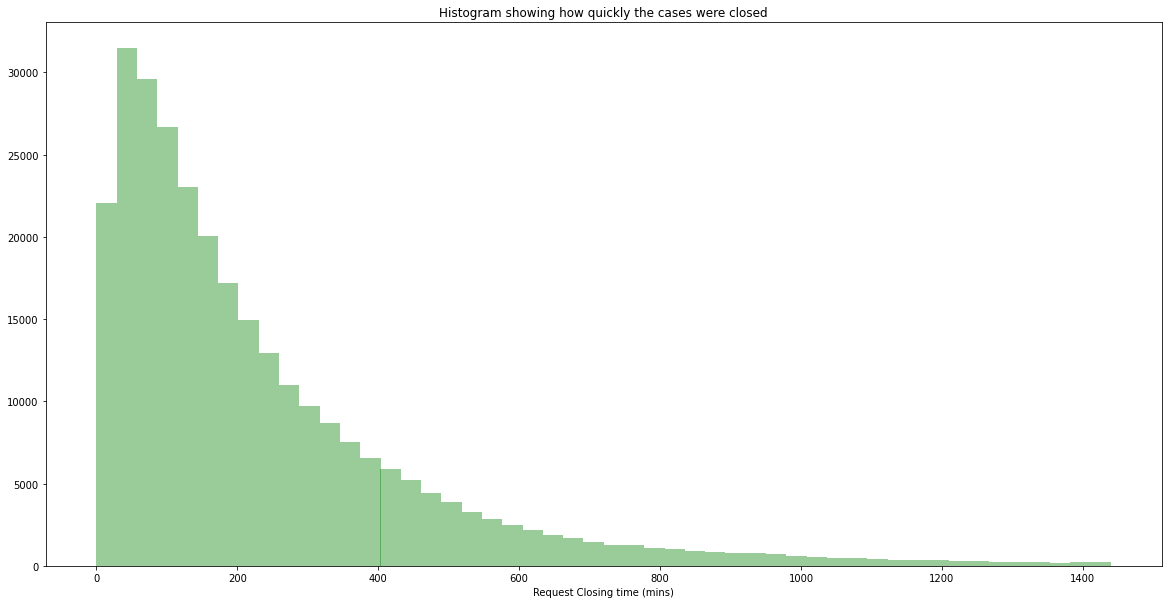

In [138]:
# Histogram showing how quickly the cases were closed
plt.figure(figsize=(20,10))
sns.distplot(df['Request_Closing_Time'],kde=False,color='g')
plt.title('Histogram showing how quickly the cases were closed')
plt.xlabel('Request Closing time (mins)')
plt.show()

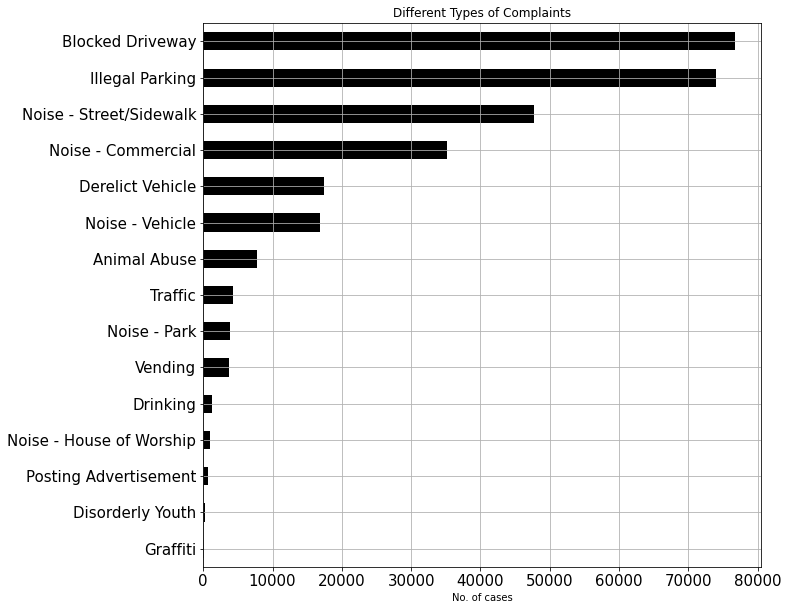

In [139]:
complaints = df['Complaint Type'].value_counts().sort_values()
plt.figure(figsize=(10,10))
complaints.plot(kind='barh',grid=True,color='black',fontsize=15)
plt.title('Different Types of Complaints')
plt.xlabel('No. of cases')
plt.show()

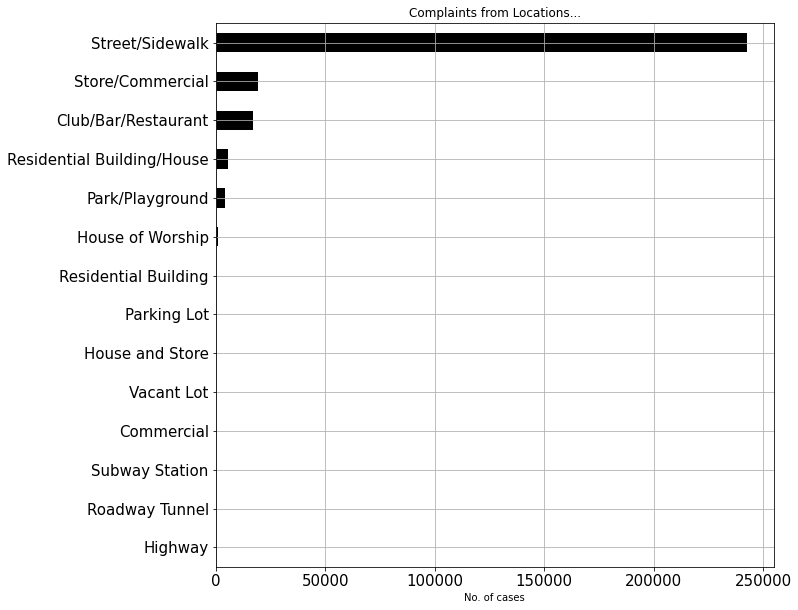

In [140]:
location = df['Location Type'].value_counts().sort_values()
plt.figure(figsize=(10,10))
location.plot(kind='barh',grid=True,color='black',fontsize=15)
plt.title('Complaints from Locations...')
plt.xlabel('No. of cases')
plt.show()

In [141]:
df['Resolution Description'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                      88073
The Police Department responded to the complaint and took action to fix the condition.                                                                                                       59383
The Police Department responded and upon arrival those responsible for the condition were gone.                                                                                              56615
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                        37369
The Police Department issued a summons in response to the complaint.                                                                                                                         28180
The Police Department rev

In [142]:
df['City'].value_counts().head(5)

BROOKLYN         96814
NEW YORK         61867
BRONX            40182
STATEN ISLAND    12186
JAMAICA           7144
Name: City, dtype: int64